# Olympic Data

### Import_Library and read file csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from tabulate import tabulate  
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler , MinMaxScaler, StandardScaler
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [129]:
df=pd.read_csv("dataset_olympics.csv",sep=",",encoding="utf-8")
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,35656,Stuart Fitzsimmons,M,19.0,NaN,NaN,Great Britain,GBR,1976 Winter,1976,Winter,Innsbruck,Alpine Skiing,Alpine Skiing Men's Giant Slalom,NaN
69996,35656,Stuart Fitzsimmons,M,19.0,NaN,NaN,Great Britain,GBR,1976 Winter,1976,Winter,Innsbruck,Alpine Skiing,Alpine Skiing Men's Slalom,NaN
69997,35657,"David Thomas ""Dave"" Fitzsimons",M,26.0,170.0,65.0,Australia,AUS,1976 Summer,1976,Summer,Montreal,Athletics,"Athletics Men's 10,000 metres",NaN
69998,35657,"David Thomas ""Dave"" Fitzsimons",M,30.0,170.0,65.0,Australia,AUS,1980 Summer,1980,Summer,Moskva,Athletics,"Athletics Men's 5,000 metres",NaN


### Viewing data

In [3]:
df.sample(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
34634,17851,Pierre Canavse,M,19.0,178.0,70.0,France,FRA,1964 Summer,1964,Summer,Tokyo,Swimming,Swimming Men's 4 x 200 metres Freestyle Relay,NaN
10676,5835,Mert Atl,M,23.0,191.0,70.0,Turkey,TUR,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 20 kilometres Walk,NaN
40345,20757,Andr Chilo,M,21.0,170.0,70.0,France,FRA,1920 Summer,1920,Summer,Antwerpen,Rugby,Rugby Men's Rugby,Silver
54678,28051,Piero D'Inzeo,M,33.0,174.0,64.0,Italy,ITA,1956 Summer,1956,Summer,Stockholm,Equestrianism,"Equestrianism Mixed Jumping, Team",Silver
8699,4779,Lorenzo Aragon Armenteros,M,22.0,163.0,69.0,Cuba,CUB,1996 Summer,1996,Summer,Atlanta,Boxing,Boxing Men's Featherweight,NaN
61698,31581,Regula Egger,F,26.0,178.0,70.0,Switzerland,SUI,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's Javelin Throw,NaN
4579,2604,Khaido Alexouli,F,25.0,180.0,60.0,Greece,GRE,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's Long Jump,NaN
40002,20574,Cheung Mei Han,F,30.0,NaN,NaN,Hong Kong,HKG,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Two Person Dinghy,NaN
47399,24429,Paulo Miguel Curvelo,M,32.0,173.0,74.0,Portugal,POR,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Men's 4 x 400 metres Relay,NaN
1684,936,Isiaq Adeyanju,M,24.0,162.0,65.0,Nigeria,NGR,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Men's 4 x 100 metres Relay,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      70000 non-null  int64  
 1   Name    70000 non-null  object 
 2   Sex     70000 non-null  object 
 3   Age     67268 non-null  float64
 4   Height  53746 non-null  float64
 5   Weight  52899 non-null  float64
 6   Team    70000 non-null  object 
 7   NOC     70000 non-null  object 
 8   Games   70000 non-null  object 
 9   Year    70000 non-null  int64  
 10  Season  70000 non-null  object 
 11  City    70000 non-null  object 
 12  Sport   70000 non-null  object 
 13  Event   70000 non-null  object 
 14  Medal   9690 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 8.0+ MB


### - This Data has Null Values

In [130]:
# Seprating out the categorical and continuous variables
list_1 = df.select_dtypes(include='object')     
list_2 = df.select_dtypes(exclude='object')
print(tabulate({"Categorical":list_1,
                "numerical": list_2}, headers = ["categorical", "numerical"]))

categorical    numerical
-------------  -----------
Name           ID
Sex            Age
Team           Height
NOC            Weight
Games          Year
Season
City
Sport
Event
Medal


# preprocessing

## Cleaning

In [6]:
data=df.copy()

In [7]:
data.drop_duplicates(inplace=True)

In [8]:
df.isnull().sum()

ID            0
Name          0
Sex           0
Age        2732
Height    16254
Weight    17101
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     60310
dtype: int64

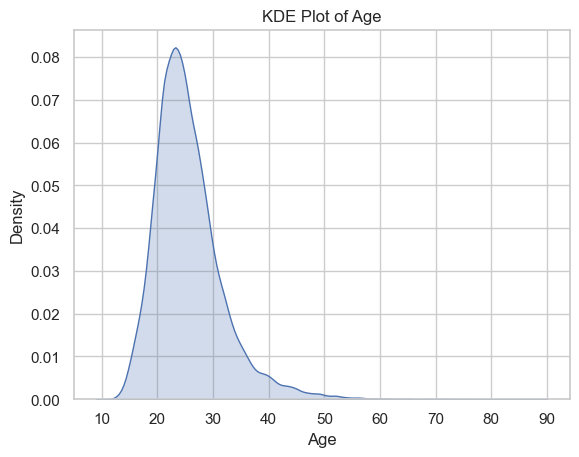

In [9]:
sns.set(style="whitegrid")  # Set the style of the plot (you can change it as needed)

# Assuming 'data' is your DataFrame, and 'Age' is the column you want to plot
sns.kdeplot(data=data, x="Age", shade=True)

# Optionally, you can add labels and a title to your plot
plt.xlabel("Age")
plt.ylabel("Density")
plt.title("KDE Plot of Age")

# Show the plot (if not in a Jupyter Notebook, you may need to use plt.show())
plt.show()

In [10]:
data['Age'].describe()

count    66946.000000
mean        25.544260
std          6.253257
min         11.000000
25%         21.000000
50%         24.000000
75%         28.000000
max         88.000000
Name: Age, dtype: float64

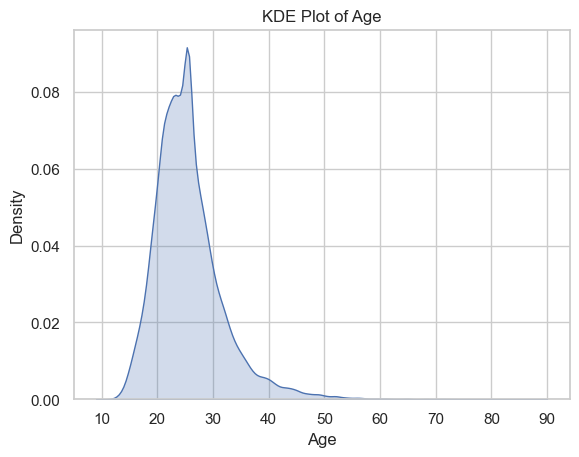

In [11]:
sns.set(style="whitegrid")

# Assuming 'data' is your DataFrame and 'Age' is the column you want to plot
# Fill missing values in the 'Age' column with the mean
sns.kdeplot(data=data['Age'].fillna(data['Age'].mean()), shade=True)

plt.xlabel("Age")
plt.ylabel("Density")
plt.title("KDE Plot of Age")

plt.show()

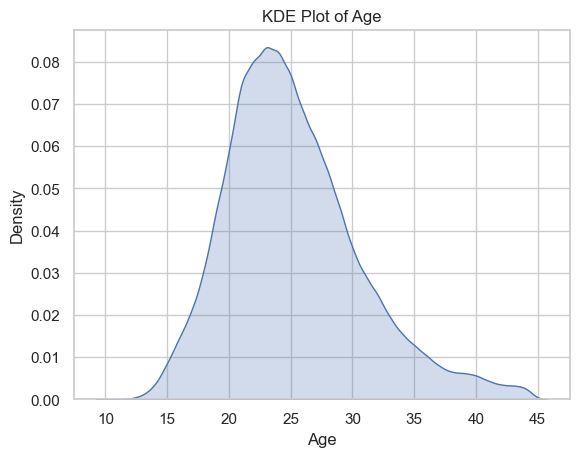

In [54]:
sns.set(style="whitegrid")  # Set the style of the plot

# Fill missing values in the 'Age' column using forward fill (ffill)
age_filled = data['Age'].fillna(method="ffill")

# Create the KDE plot
sns.kdeplot(data=age_filled, shade=True)

plt.xlabel("Age")
plt.ylabel("Density")
plt.title("KDE Plot of Age")

plt.show()

In [55]:
data['Age'].fillna(method="ffill",inplace=True)

In [14]:
data['Height'].describe()

count    53741.000000
mean       175.504736
std         10.384481
min        127.000000
25%        168.000000
50%        175.000000
75%        183.000000
max        223.000000
Name: Height, dtype: float64

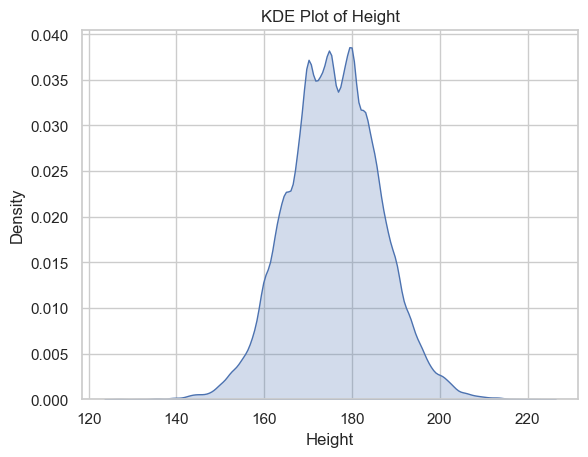

In [56]:
sns.set(style="whitegrid")  # Set the style of the plot

# Create the KDE plot for the 'Height' column with shading
sns.kdeplot(data=data, x='Height', shade=True)

plt.xlabel("Height")
plt.ylabel("Density")
plt.title("KDE Plot of Height")

plt.show()

<Axes: xlabel='Height', ylabel='Density'>

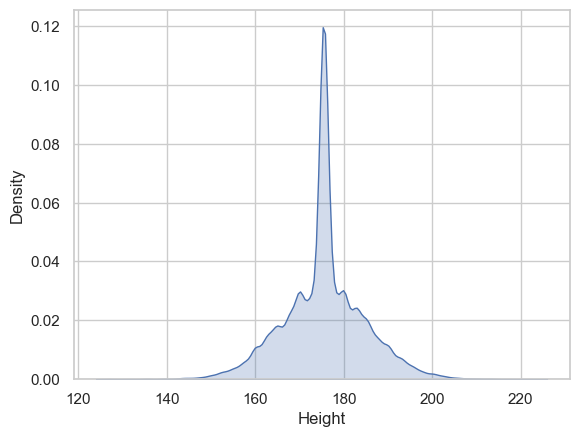

In [16]:
sns.kdeplot(data=data,x=data['Height'].fillna(data['Height'].mean()),shade=True)

<Axes: xlabel='Height', ylabel='Density'>

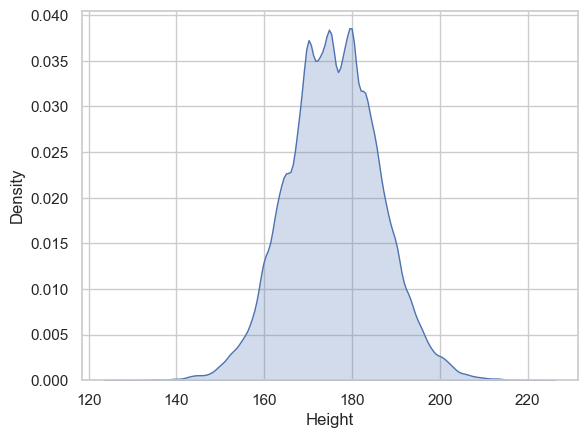

In [17]:
sns.kdeplot(data=data,x=data['Height'].fillna(method="ffill"),shade="True")

In [18]:
data['Height'].fillna(method="ffill",inplace=True)

In [19]:
data['Weight'].describe()

count    52899.000000
mean        70.900216
std         14.217489
min         25.000000
25%         61.000000
50%         70.000000
75%         79.000000
max        214.000000
Name: Weight, dtype: float64

<Axes: xlabel='Weight', ylabel='Density'>

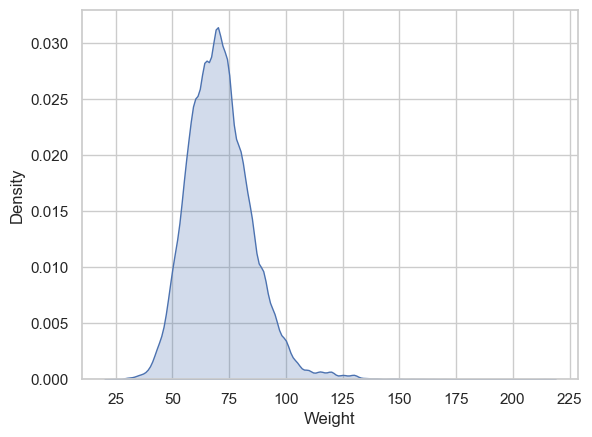

In [20]:
sns.kdeplot(data=data,x='Weight',shade=True)

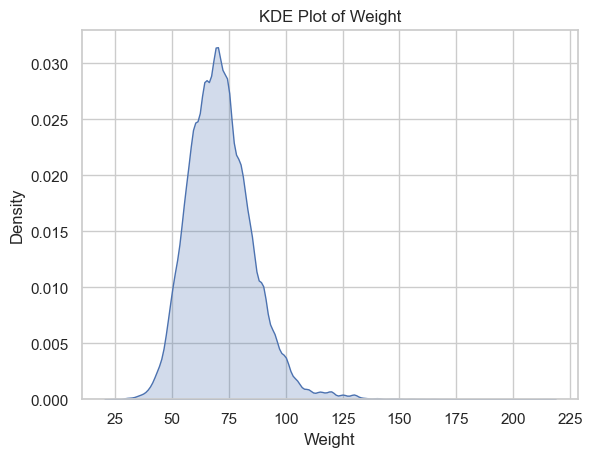

In [57]:
sns.set(style="whitegrid")  # Set the style of the plot

# Fill missing values in the 'Weight' column using backward fill (bfill)
weight_filled = data['Weight'].fillna(method='bfill')

# Create the KDE plot for the 'Weight' column with shading
sns.kdeplot(data=weight_filled, shade=True)

plt.xlabel("Weight")
plt.ylabel("Density")
plt.title("KDE Plot of Weight")

plt.show()

In [22]:
data['Weight'].fillna(method='bfill',inplace=True)

In [23]:
data['Medal'].fillna("No_Medal",inplace=True)

In [24]:
data.isnull().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69617 entries, 0 to 69999
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      69617 non-null  int64  
 1   Name    69617 non-null  object 
 2   Sex     69617 non-null  object 
 3   Age     69617 non-null  float64
 4   Height  69617 non-null  float64
 5   Weight  69617 non-null  float64
 6   Team    69617 non-null  object 
 7   NOC     69617 non-null  object 
 8   Games   69617 non-null  object 
 9   Year    69617 non-null  int64  
 10  Season  69617 non-null  object 
 11  City    69617 non-null  object 
 12  Sport   69617 non-null  object 
 13  Event   69617 non-null  object 
 14  Medal   69617 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 8.5+ MB


## Outliers

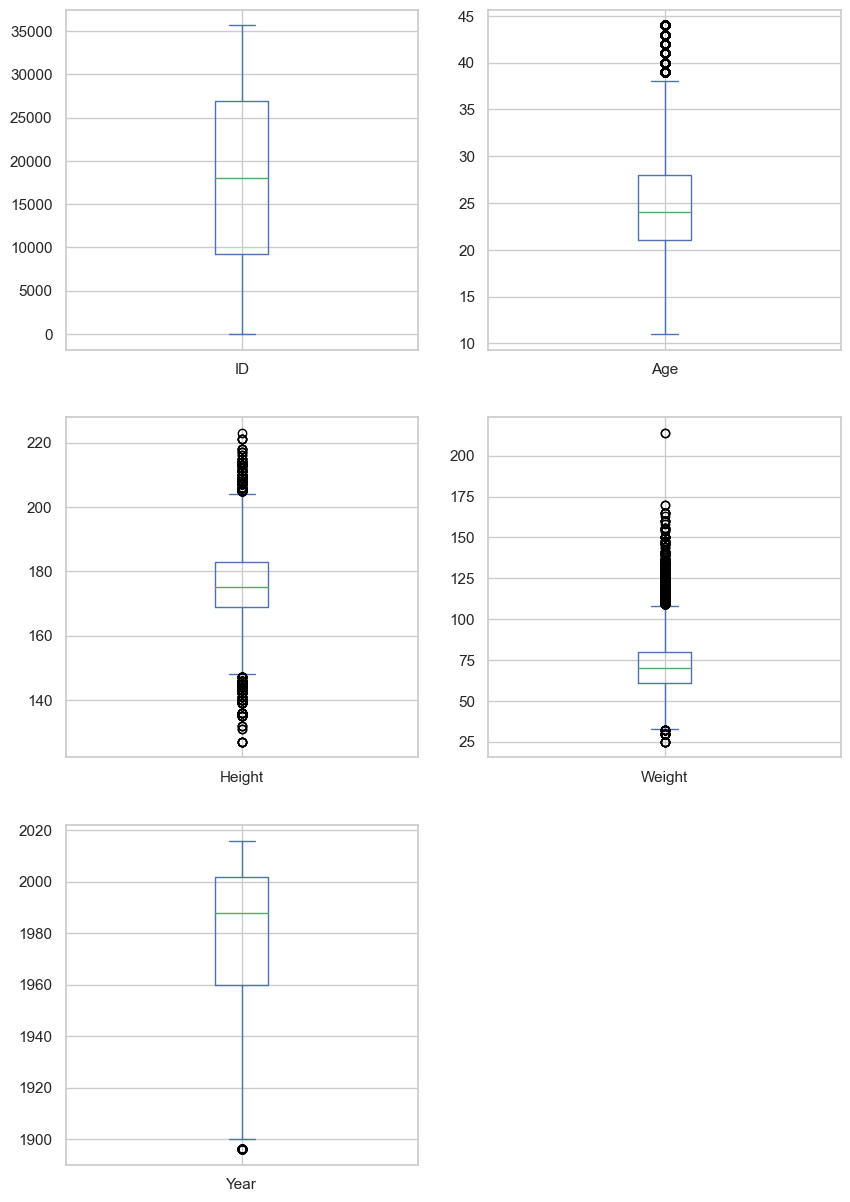

In [139]:
data.plot(kind="box", subplots=True, figsize=(10, 15), layout=(3, 2))

plt.show()  

### Age_Outliers

In [27]:
norm_upper_limit = data["Age"].mean() + 3 * data["Age"].std()
norm_lower_limit = data["Age"].mean() - 3 * data["Age"].std()

In [28]:
df_normal_new2 = data[(data["Age"] > norm_lower_limit) & (data["Age"] < norm_upper_limit)]

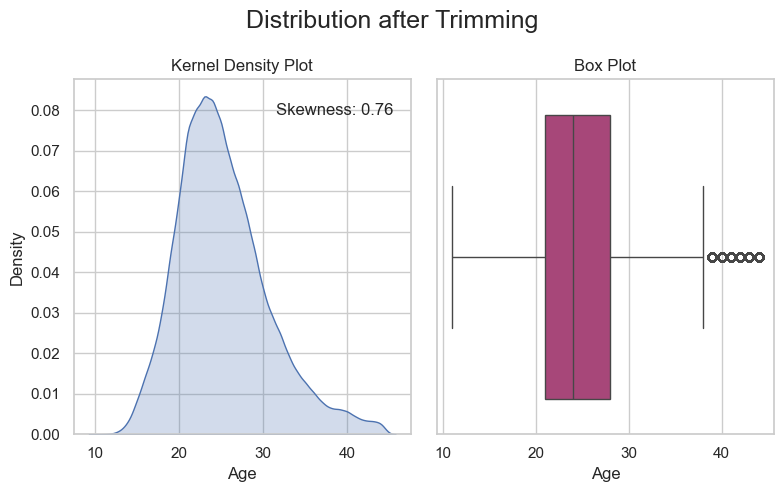

In [145]:
import scipy.stats as stats

plt.figure(figsize=(8, 5))
plt.suptitle("Distribution after Trimming", fontsize=18)

# Calculate skewness
age_data = df_normal_new2['Age']
skewness = stats.skew(age_data)

# Create the first subplot with a KDE plot
plt.subplot(1, 2, 1)
sns.kdeplot(data=age_data, shade=True)
plt.title("Kernel Density Plot")

# Add skewness as text to the plot
plt.text(0.6, 0.9, f"Skewness: {skewness:.2f}", transform=plt.gca().transAxes, fontsize=12)

# Create the second subplot with a box plot
plt.subplot(1, 2, 2)
sns.boxplot(data=df_normal_new2, x='Age', palette="magma")
plt.title("Box Plot")

# Ensure proper layout and display the plot
plt.tight_layout()
plt.show()

### Height_Outliers

In [30]:
data=df_normal_new2.copy()

In [31]:
norm_upper_limit = data["Height"].mean() + 3 * data["Height"].std()
norm_lower_limit = data["Height"].mean() - 3 * data["Height"].std()

In [32]:
df_normal_new3 = data[(data["Height"] > norm_lower_limit) & (data["Height"] < norm_upper_limit)]

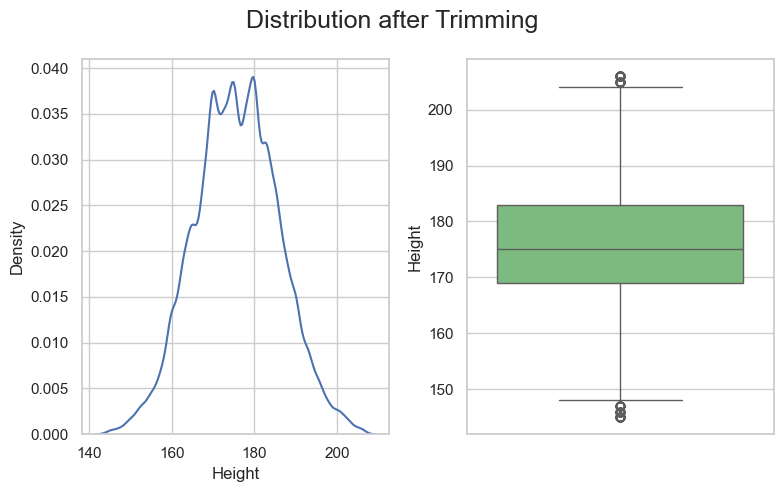

In [150]:
plt.figure(figsize=(8,5))
plt.suptitle("Distribution after Trimming",fontsize=18)
plt.subplot(1,2,1)
sns.kdeplot(data = df_normal_new3['Height'])
plt.subplot(1,2,2)
sns.boxplot(data = df_normal_new3['Height'], palette="Greens")
plt.tight_layout()
plt.show()

### Weight_outliers

In [34]:
norm_upper_limit = data["Weight"].mean() + 3 * data["Weight"].std()
norm_lower_limit = data["Weight"].mean() - 3 * data["Weight"].std()

In [35]:
df_normal_new1 = data[(data["Weight"] > norm_lower_limit) & (data["Weight"] < norm_upper_limit)]

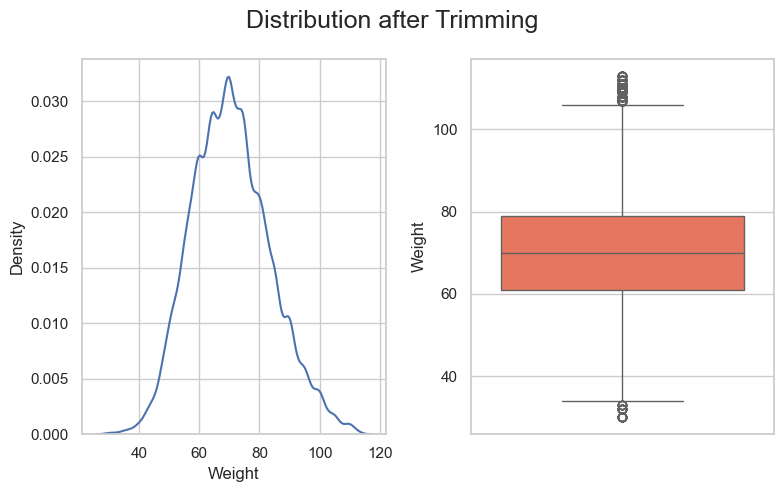

In [152]:
plt.figure(figsize=(8,5))
plt.suptitle("Distribution after Trimming",fontsize=18)
plt.subplot(1,2,1)
sns.kdeplot(data = df_normal_new1['Weight'])
plt.subplot(1,2,2)
sns.boxplot(data = df_normal_new1['Weight'], palette="Reds")
plt.tight_layout()
plt.show()

### -Done Outliers!

# 

# Data Visualization

In [37]:
data

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No_Medal
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No_Medal
2,3,Gunnar Nielsen Aaby,M,24.0,170.0,82.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No_Medal
3,4,Edgar Lindenau Aabye,M,34.0,170.0,82.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No_Medal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,35656,Stuart Fitzsimmons,M,19.0,192.0,65.0,Great Britain,GBR,1976 Winter,1976,Winter,Innsbruck,Alpine Skiing,Alpine Skiing Men's Giant Slalom,No_Medal
69996,35656,Stuart Fitzsimmons,M,19.0,192.0,65.0,Great Britain,GBR,1976 Winter,1976,Winter,Innsbruck,Alpine Skiing,Alpine Skiing Men's Slalom,No_Medal
69997,35657,"David Thomas ""Dave"" Fitzsimons",M,26.0,170.0,65.0,Australia,AUS,1976 Summer,1976,Summer,Montreal,Athletics,"Athletics Men's 10,000 metres",No_Medal
69998,35657,"David Thomas ""Dave"" Fitzsimons",M,30.0,170.0,65.0,Australia,AUS,1980 Summer,1980,Summer,Moskva,Athletics,"Athletics Men's 5,000 metres",No_Medal


## Q1 : What is the ratio between Male to Female that participated in the olympic ?

In [80]:
da1 = data['Sex'].value_counts().reset_index(name='Count')

# Set the index name to 'Gender'
da1 = da1.rename(columns={'index': 'Gender'})
da1

,Gender,Count
0,M,50566
1,F,17990


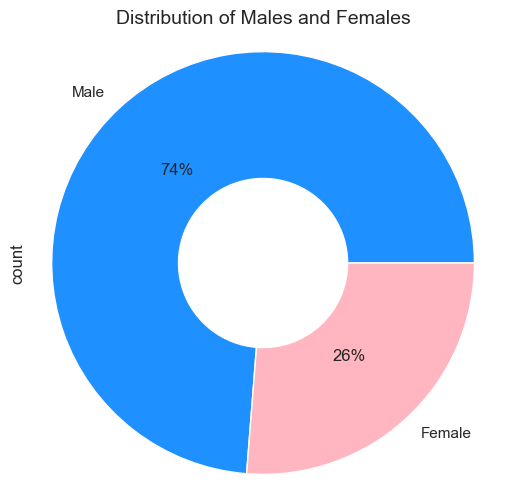

In [73]:
plt.figure(figsize=(6, 6))  # Increase the figsize for better visualization
size = 0.6

# Set the title with an appropriate font size
plt.title("Distribution of Males and Females", fontsize=14)

# Assuming "da1" is your DataFrame
# Replace 'da1' with the actual DataFrame name
da1["count"].plot.pie(autopct='%0.0f%%', labels=['Male', 'Female'], colors=['#1E90FF', '#FFB6C1'], wedgeprops=dict(width=size, edgecolor='w'))

plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular
plt.show()

#### - Number of Male is heigher than Female

# 

## Q2 : what is rate of female to male that win with Medal

In [83]:
da2=data.groupby('Sex')['Medal'].value_counts().reset_index(name='Count')
da2

,Sex,Medal,Count
0,F,No_Medal,15399
1,F,Gold,906
2,F,Silver,850
3,F,Bronze,835
4,M,No_Medal,43595
5,M,Gold,2345
6,M,Bronze,2330
7,M,Silver,2296


In [89]:
grouped_data = data.groupby(['Sex', 'Medal']).size().reset_index(name='Count')

# Create a bar chart
fig = px.bar(
    grouped_data,
    x='Sex',
    y='Count',
    color='Medal',
    labels={'Sex': 'Gender', 'Medal': 'Medal'},
    title='Distribution of Medals by Gender',
     text='Count',
)

# Show the bar chart
fig.show()

### ALots of participants male and female not win medal at olympic

## Q3 : What is number of participants per year ?

In [42]:
data['Year'].unique()

array([1992, 2012, 1920, 1900, 1988, 1994, 1932, 2002, 1952, 1980, 2000,
       1996, 1912, 1924, 2014, 1948, 1998, 2006, 2008, 2016, 2004, 1960,
       1964, 1984, 1968, 1936, 1956, 1928, 1976, 1972, 2010, 1906, 1904,
       1908, 1896], dtype=int64)

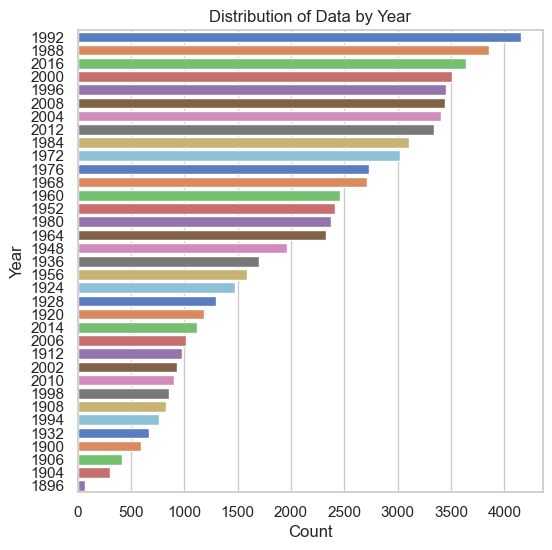

In [153]:
sorted_years = data['Year'].value_counts().index.tolist()

plt.figure(figsize=(6, 6))
sns.countplot(data=data, y="Year", order=sorted_years, palette="muted")
plt.title("Distribution of Data by Year")
plt.xlabel("Count")
plt.ylabel("Year")
plt.show()

### 1992 is heigher 

## Q4 : What is the most year participants win Gold Medal ? 

In [44]:
da3=data[data['Medal']=='Gold'] ['Year'].value_counts().reset_index(name='count')
da3.set_axis(['Year','Count'],axis='columns',inplace=True)


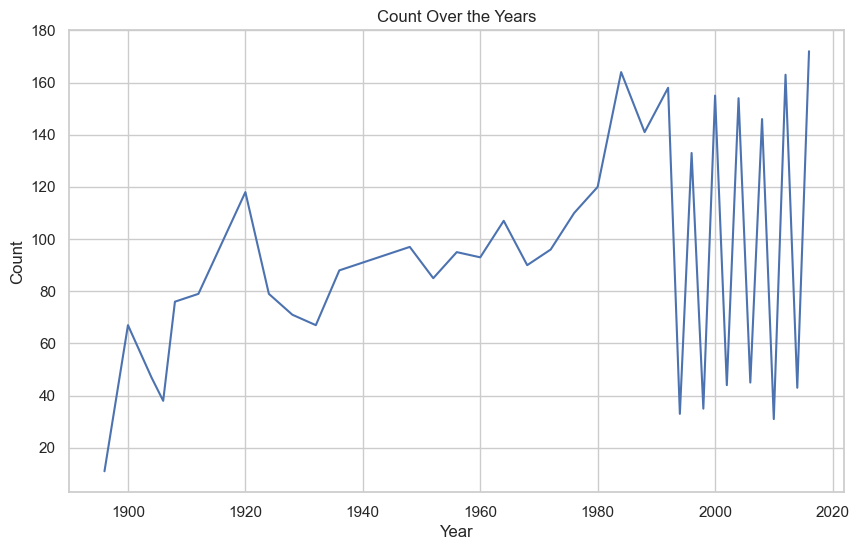

In [97]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=da3, x="Year", y="Count", sort=True)

plt.title("Count Over the Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid(True)  # Add grid lines for better readability

plt.show()

### 2016 has heigher Gold Medal

## Q5 : What is heigher sport that sporters paly it? 

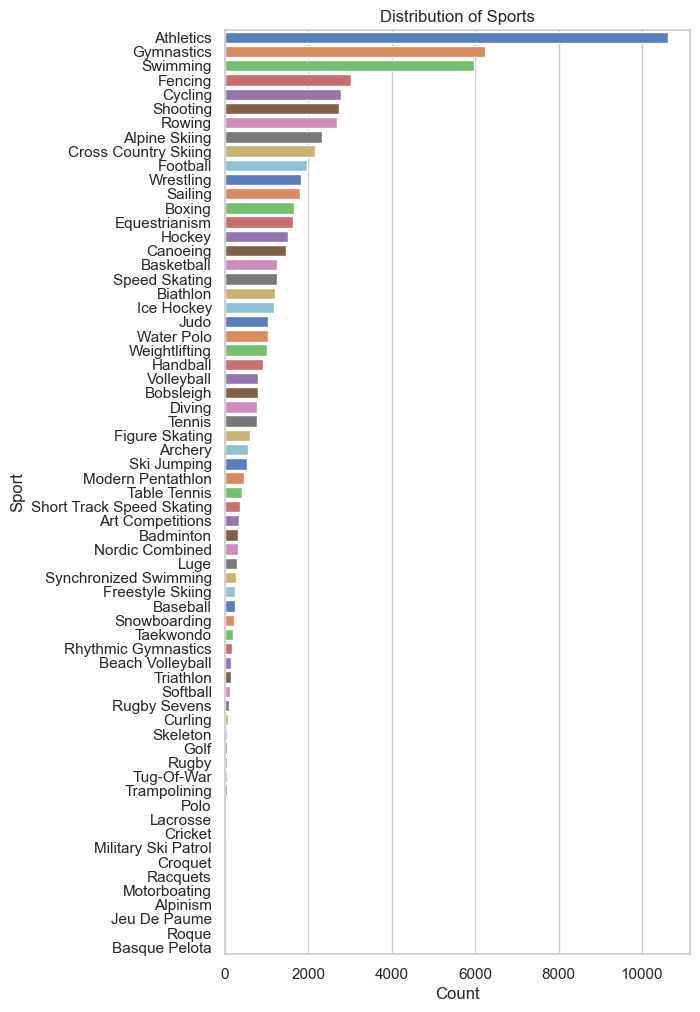

In [154]:
sport_counts = data['Sport'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(6, 12))  # Adjust the figure size for better visualization

# Create a countplot using the sorted sport counts
sns.countplot(data=data, y='Sport', order=sport_counts.index, palette="muted")

plt.title("Distribution of Sports")
plt.xlabel("Count")
plt.ylabel("Sport")
plt.show()

### -Athletics

## Q6 : What is interval age that sporter participate ?

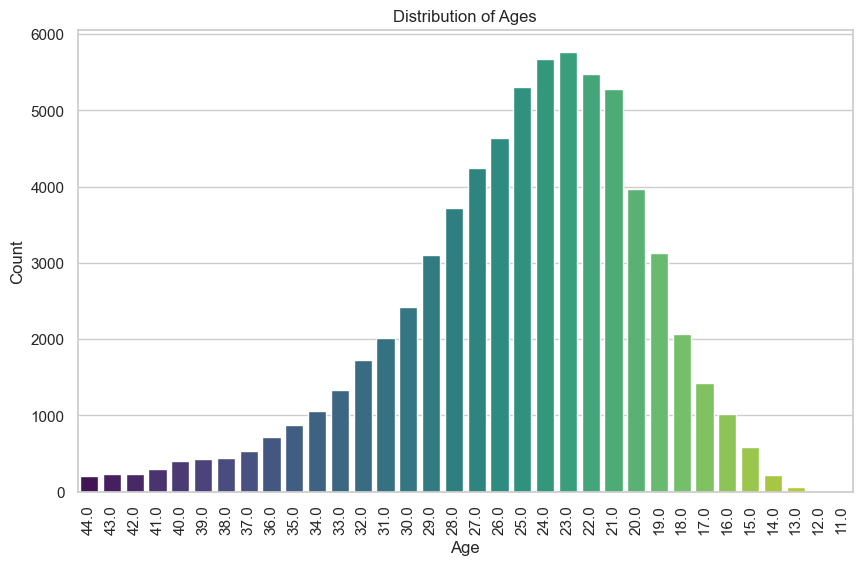

In [155]:
age_counts = df_normal_new2['Age'].value_counts().sort_index(ascending=False)

plt.figure(figsize=(10, 6))  # Adjust the figure size for better visualization

# Create a countplot using the sorted age counts
sns.countplot(data=df_normal_new2, x='Age', order=age_counts.index, palette="viridis")

plt.title("Distribution of Ages")
plt.xlabel("Age")
plt.ylabel("Count")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

### - From 21 to 25 age is heigher interval for sporter 

## Q7 : what is the raio of seasion ?

In [48]:
da6=data['Season'].value_counts().reset_index()
da6.set_axis(['Season','count'],axis='columns',inplace=True)

da6

,Season,count
0,Summer,57049
1,Winter,11507


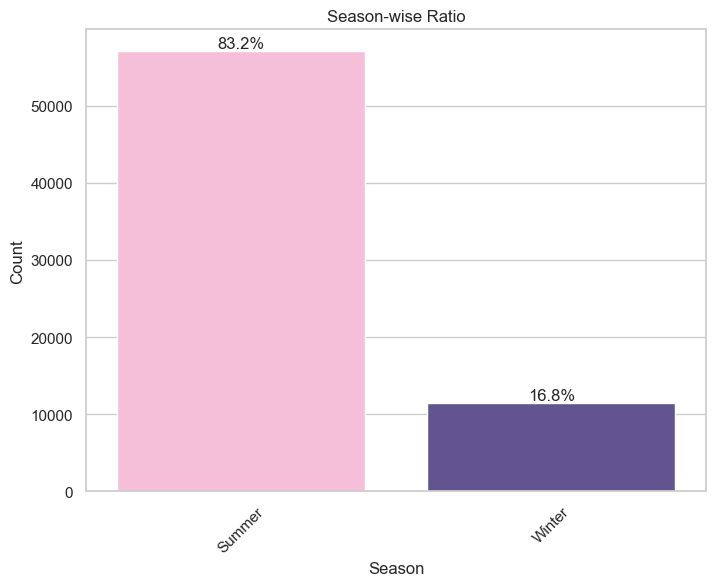

In [161]:
plt.figure(figsize=(8, 6))  # Adjust the figure size for better visualization

# Calculate the total count
total = da6['count'].sum()

# Create the barplot with percentage labels
ax = sns.barplot(x="Season", y="count", data=da6, palette=["#FFB6D9", "#5C4B99"])

plt.title("Season-wise Ratio")
plt.xlabel("Season")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add percentage labels rounded to one decimal place
for p in ax.patches:
    height = p.get_height()
    percentage = round((height / total) * 100, 1)  # Round to one decimal place
    ax.annotate(f'{percentage}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')

plt.show()

## Q8 : What is the raio between the different types of medals ?

In [126]:
da5=data['Medal'].value_counts().reset_index()
da5.set_axis(['Medal1','Medal'],axis='columns',inplace=True)
da5

,Medal1,Medal
0,No_Medal,58994
1,Gold,3251
2,Bronze,3165
3,Silver,3146


<Axes: ylabel='Medal'>

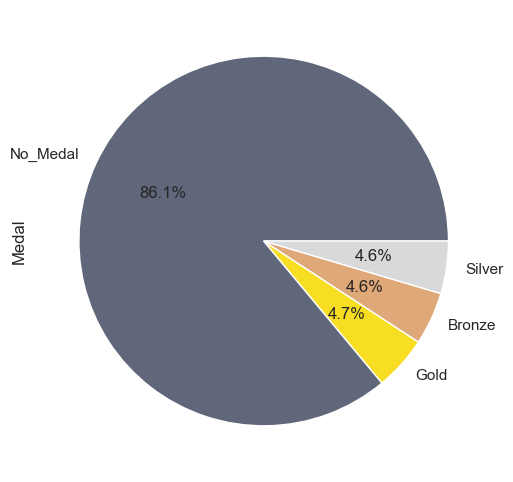

In [127]:
plt.figure(figsize = (6,6))
da5["Medal"].plot.pie(autopct='%.1f%%',labels=da5['Medal1'],colors=["#61677A","#F8DE22","#DFA878","#D8D9DA"])

### Creating CSV file for updated data

In [52]:
# saving the dataframe
data.to_csv('Olympic_Updated_Data.csv')


### Connecting to MYSQL Server 

In [131]:
import mysql.connector as sql

In [173]:
db = sql.connect(host='localhost', user='root',password='scotttiger',database='olympic')
mycursor = db.cursor()

In [174]:
query = "SELECT * FROM OLYMPIC"
mycursor.execute(query)

# Fetch all rows and store them in a list of tuples
data3 = mycursor.fetchall()

# Create a DataFrame from the fetched data
df = pd.DataFrame(data3, columns=[desc[0] for desc in mycursor.description])

# Print the DataFrame
df

,MyUnknownColumn,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No_Medal
1,1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No_Medal
2,2,3,Gunnar Nielsen Aaby,M,24.0,170.0,82.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No_Medal
3,3,4,Edgar Lindenau Aabye,M,34.0,170.0,82.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No_Medal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68365,69995,35656,Stuart Fitzsimmons,M,19.0,192.0,65.0,Great Britain,GBR,1976 Winter,1976,Winter,Innsbruck,Alpine Skiing,Alpine Skiing Men's Giant Slalom,No_Medal
68366,69996,35656,Stuart Fitzsimmons,M,19.0,192.0,65.0,Great Britain,GBR,1976 Winter,1976,Winter,Innsbruck,Alpine Skiing,Alpine Skiing Men's Slalom,No_Medal
68367,69997,35657,"David Thomas ""Dave"""" Fitzsimons""",M,26.0,170.0,65.0,Australia,AUS,1976 Summer,1976,Summer,Montreal,Athletics,"Athletics Men's 10,000 metres",No_Medal
68368,69998,35657,"David Thomas ""Dave"""" Fitzsimons""",M,30.0,170.0,65.0,Australia,AUS,1980 Summer,1980,Summer,Moskva,Athletics,"Athletics Men's 5,000 metres",No_Medal
